# Movie recommendation system

## 1. Introduction 

<br> 
<center><img src="https://machinelearningmarvel.in/wp-content/uploads/2020/12/jakob-owens-CiUR8zISX60-unsplash-768x519.jpg" width="500" height="300" /></center>
<br>

**Recommender System** is a system that **seeks to predict or filter preferences according to the user’s choices.** Recommender systems are utilized in a variety of areas including **movies, music, news, books, research articles, search queries, social tags, and products in general.**

**Why do we need recommendation systems?**

For any given product, there are sometimes thousands of options to choose from. Think of the examples above: streaming videos, social networking, online shopping; the list goes on. Recommender systems help to personalize a platform and help the user find something they like.
**The easiest and simplest way to do this is to recommend the most popular items. However, to really enhance the user experience through personalized recommendations, we need dedicated recommender systems.**

<br> 
<center><img src="https://i.ytimg.com/vi/dhVePtyECFw/maxresdefault.jpg" width="500" height="300" /></center>
<br>

## 2. Types of Recommender Systems

### 2.1 Content Based Filtering

**Content-based methods** are based on the **similarity of movie attributes.** Using this type of recommender system, **if a user watches one movie, similar movies are recommended.** 

For example, **if a user watches a comedy movie** starring Adam Sandler, **the system will recommend them movies in the same genre or starring the same actor, or both.** With this in mind, the input for building a content-based recommender system is movie attributes.


<br> 
<center><img src="https://miro.medium.com/max/2400/1*dsuGJVJSqhhhNySFnt7EVw.png" width="500" height="300" /></center>
<br>


### 2.2 Collaborative Filtering

**Collaborative filtering**, the system is based on **past interactions between users and movies.** With this in mind, the input for a collaborative filtering system is made up of past data of user interactions with the movies they watch.

**For example, if user A watches M1, M2, and M3, and user B watches M1, M3, M4, we recommend M1 and M3 to a similar user C. You can see how this looks in the figure below for clearer reference.**

<br> 
<center><img src="https://miro.medium.com/max/548/1*pv6CDVqPgITYi_Nr0RygUw.png" width="500" height="300" /></center>
<br>


**Another example :**
**Content based filtering:**If a particular movie is watched by a particular person then based on the features of that movie like for example genere or cast the similar kind of movie is recommended.

**Collaborative Filtering:** Here, two similar users have watched the movie and if a girl watches another movie then that movie watched by her is recommended to him.

<br> 
<center><img src="https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2019/07/data-science-movie-recommendation-project.jpg" width="500" height="300" /></center>
<br>


## 2. Problem Statement

To search for a particular movie people often browse but people can spend hours scrolling through hundreds, of movie but never find the movie that they like.Hence recommendation systems are made which provides suggestions based on their likes which helps people to spend less time on internet. 

**We will be using Movie Lens dataset**

**The goal of this analysis is to analyse the data set, explore it and suggest top recommendations based on the past performance of the user**

## 3. Importing library

In [1]:
import numpy as np                                                
import pandas as pd                                                                      
import matplotlib.pyplot as plt                                   
import seaborn as sns                                             
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 4. Loading and understanding the dataset

In [2]:
df1 = pd.read_csv('C:\\Users\\Lenovo\\downloads\\tmdb_5000_credits.csv')
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df1.shape

(4803, 4)

In [4]:
df1.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [5]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
df2 = pd.read_csv('C:\\Users\\Lenovo\\downloads\\tmdb_5000_movies.csv')
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
df2.shape

(4803, 20)

In [8]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

**Observations:**
- We have **id coloumn** same in **df1 and df2** hence we will use **one id column** while merging 

In [11]:
df2 = df2.merge(df1,on='id')

In [12]:
df2.shape

(4803, 23)

**Observations:**
 - **Before merging** we have **4** coloumns in **df1** and **20** coloumns in **df2.**
 - **After merging** we have altogether **23 columns.**

In [13]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## 5.  Preprosessing

In [14]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

**Observations:**
- We observe that **homepage** and **tagline** consists of many null values

In [15]:
df2.drop(['homepage','tagline',"id"],axis=1,inplace=True)

**Observations:**
- We will drop **homepage, tagline** and **id column.** 

In [16]:
df2.shape

(4803, 20)

In [17]:
df2.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [18]:
df2.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B61B5D6A0>,
      dtype=object)

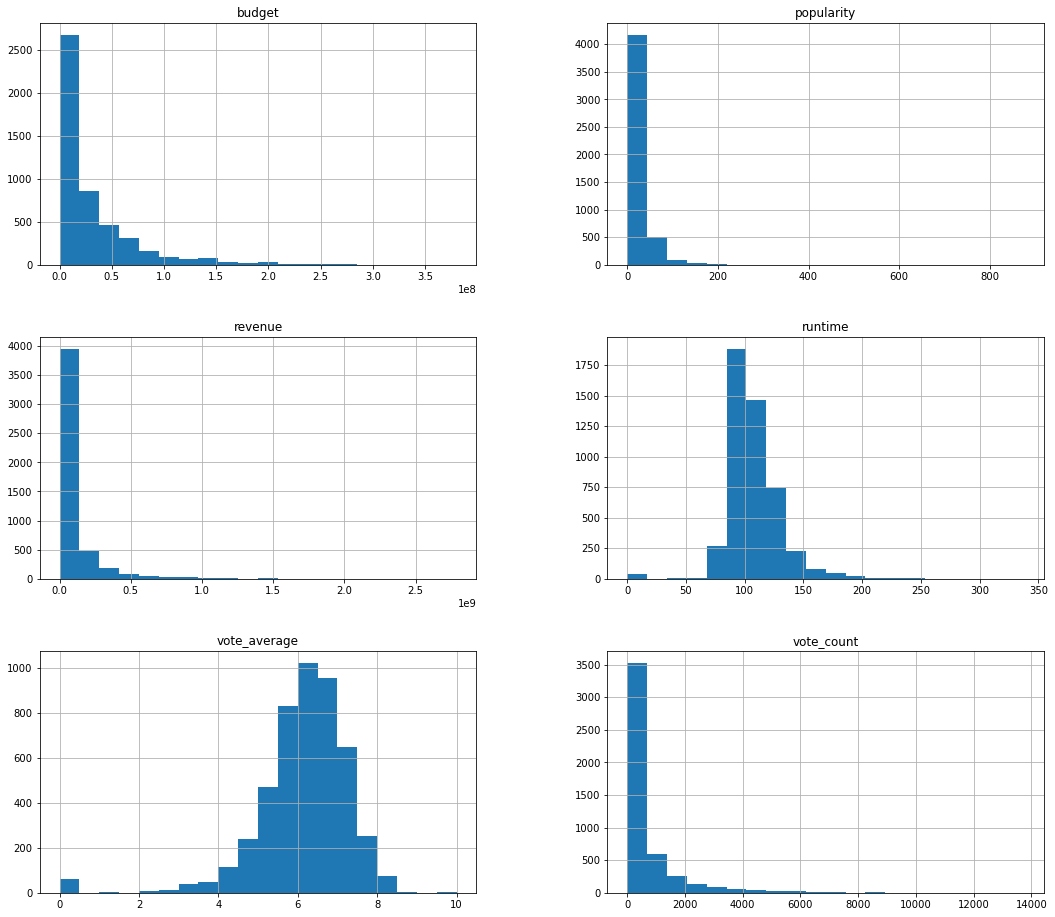

In [19]:
df2.hist(bins=20,figsize=(18, 16))

**Observations:**
- Budget and revenue are very high.
- Popularity rate is high between 0 to 140.The movies popularity rate between 50 to 120 is very high.
- Average vote was high between 5 to 8.
- Vote count is high around 1000

##  6. EDA

### 6.1 What are the average vote given to the movies

In [20]:
df2["vote_average"].value_counts(sort=False)

7.0    179
6.5    216
7.5     66
5.5    152
6.0    216
      ... 
5.1     60
3.4      4
4.2     21
7.8     36
5.9    196
Name: vote_average, Length: 71, dtype: int64

Text(0.5, 1.0, 'Count plot for Vote')

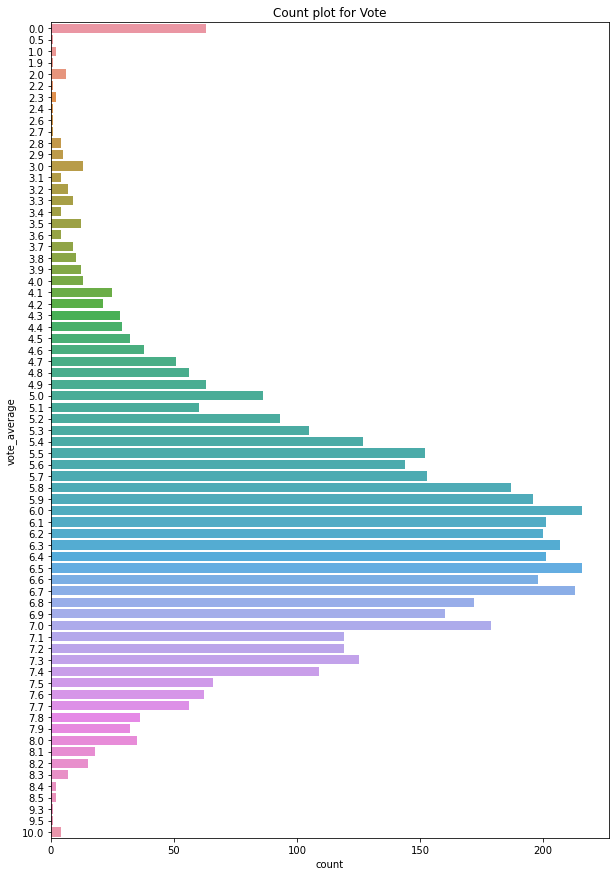

In [21]:
countplt, ax = plt.subplots(figsize = (10,15))
sns.countplot(y='vote_average', data=df2).set_title('Count plot for Vote')

**Observations:**

On an average **6 to 6.5 votes** given for the movie.

### 6.2 What is the Vote Average for specific movies? 

In [22]:
df2["original_title"].describe()

count       4803
unique      4801
top       Batman
freq           2
Name: original_title, dtype: object

In [23]:
vote=df2.groupby("original_title").agg({
    "vote_average" : "sum"
}).sort_values('vote_average',ascending=False)[:10]

vote.head(10)

,vote_average
original_title,
Batman,13.1
Out of the Blue,12.4
"Dancer, Texas Pop. 81",10.0
Little Big Top,10.0
Me You and Five Bucks,10.0
Stiff Upper Lips,10.0
Sardaarji,9.5
One Man's Hero,9.3
The Shawshank Redemption,8.5


**Observations:**
- We see that **Batman** has **maximum** Vote Average.

**Its Visualisation:**

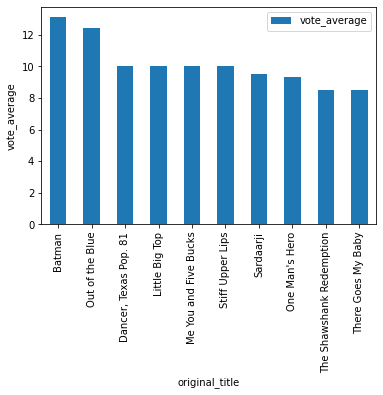

In [24]:
vote.plot(kind ="bar")
plt.ylabel("vote_average")
plt.show()

**Observations:** 

- We can see that **Batman** is having **highest vote** amoung the others

### 6.3 How is the status of the movie dependent on title of the movie?

In [25]:
df2["status"].describe()

count         4803
unique           3
top       Released
freq          4795
Name: status, dtype: object

**Observations:**
- We have 3 unique values 

In [26]:
status=pd.get_dummies(df2['status'])
status

,Post Production,Released,Rumored
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4798,0,1,0
4799,0,1,0
4800,0,1,0
4801,0,1,0


**Observations:**
- We have **3 coloumns** in status  **1.Post Production  2.Released  3.Rumored.**


In [27]:
df2=pd.concat([df2 , status], axis=1)

In [28]:
df2.drop(["status"],axis=1)
df2.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,status,title_x,vote_average,vote_count,title_y,cast,crew,Post Production,Released,Rumored
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Released,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,1,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,1,0


In [29]:
release=df2.groupby("original_title").agg({
    "Released" : "sum"
}).sort_values('Released',ascending=False)[:10]

release.head(10)

,Released
original_title,
Batman,2
Out of the Blue,2
#Horror,1
Spider,1
Splice,1
Splash,1
Spirit: Stallion of the Cimarron,1
Spider-Man 3,1
Spider-Man 2,1


**Its Visualisation:**

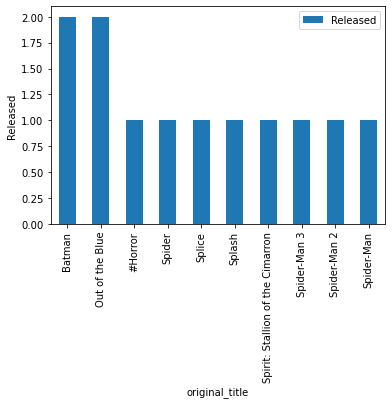

In [30]:
release.plot(kind ="bar")
plt.ylabel("Released")
plt.show()

**Observations:**
- Release rate of **Batman and Out of the Blue** is high than others.

In [31]:
Rumored=df2.groupby("original_title").agg({
    "Rumored" : "sum"
}).sort_values('Rumored',ascending=False)[:10]

Rumored.head(10)

,Rumored
original_title,
Little Big Top,1
Crying with Laughter,1
The Helix... Loaded,1
The Harvest (La Cosecha),1
The Naked Ape,1
Sucker Punch,0
Spectre,0
Split Second,0
Splice,0


**Its Visualisation:**

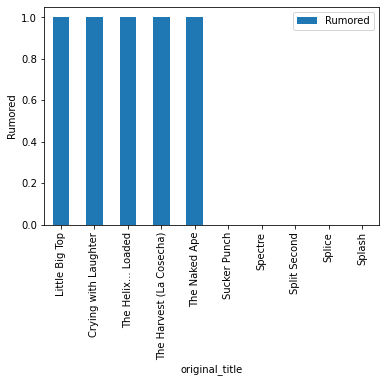

In [32]:
Rumored.plot(kind ="bar")
plt.ylabel("Rumored")
plt.show()

**Observations:**
- **First five** were Rumored and others were not.

### 6.4 Which movies were more popular?

In [33]:
df2["popularity"].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [34]:
df2.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,status,title_x,vote_average,vote_count,title_y,cast,crew,Post Production,Released,Rumored
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Released,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,1,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,1,0


In [35]:
popular=df2.groupby("original_title").agg({
    "popularity" : "sum"
}).sort_values('popularity',ascending=False)[:10]

popular.head(10)

,popularity
original_title,
Minions,875.581305
Interstellar,724.247784
Deadpool,514.569956
Guardians of the Galaxy,481.098624
Mad Max: Fury Road,434.278564
Jurassic World,418.708552
Pirates of the Caribbean: The Curse of the Black Pearl,271.972889
Dawn of the Planet of the Apes,243.791743
The Hunger Games: Mockingjay - Part 1,206.227151


**Its Visualisation:**

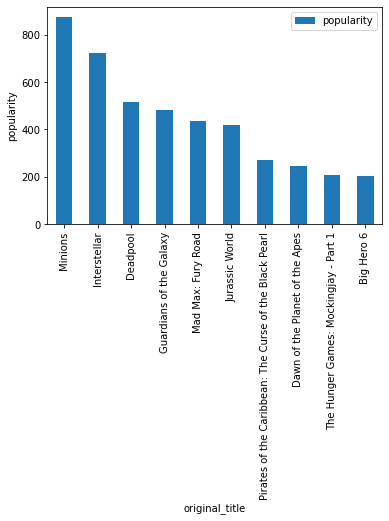

In [36]:
popular.plot(kind ="bar")
plt.ylabel("popularity")
plt.show()

**Observations:**
- **Minions** followed by **Interstellar** were more **Popular.**

### 6.5 Was the Popularity feature dependent on Language?

In [37]:
df2["original_language"].describe()

count     4803
unique      37
top         en
freq      4505
Name: original_language, dtype: object

**Observations:**
- It has **37** unique values.

In [38]:
popular_lan=df2.groupby("original_language").agg({
    "popularity" : "sum"
}).sort_values('popularity',ascending=False)[:10]

popular_lan.head(10)

,popularity
original_language,
en,99909.343321
fr,720.967952
es,426.585722
ja,410.620602
de,274.087304
it,249.455748
zh,242.896520
ko,214.375924
cn,127.576117


**Observations:**
- Language **en** was more Popular

**Its Visualisation:**

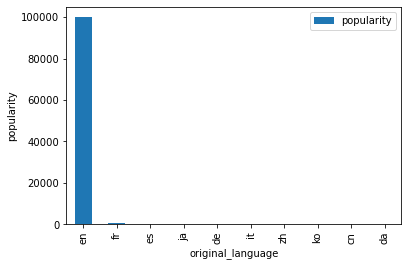

In [39]:
popular_lan.plot(kind ="bar")
plt.ylabel("popularity")
plt.show()

### 6.6 Was the vote average dependent on language?

In [40]:
vote_avg_lan=df2.groupby("original_language").agg({
    "vote_average" : "sum"
}).sort_values('vote_average',ascending=False)[:10]

vote_avg_lan.head(10)

,vote_average
original_language,
en,27325.9
fr,450.1
es,213.1
de,170.8
zh,170.1
hi,114.2
ja,112.8
it,98.4
cn,78.0


**Observations:**
- Language **en** was given **maximum** vote average.

**Its Visualisation:**

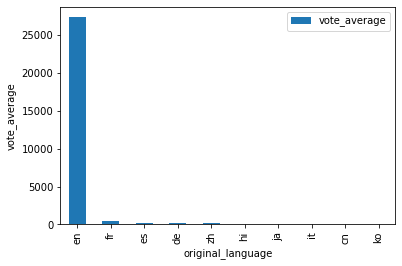

In [41]:
vote_avg_lan.plot(kind ="bar")
plt.ylabel("vote_average")
plt.show()

### 6.7 Exploring the release date feature.

In [42]:
df2["release_date"].describe()

count           4802
unique          3280
top       2006-01-01
freq              10
Name: release_date, dtype: object

**Using Datetime Library**

**Extracting Month**

In [43]:
import datetime
df2["release_date"]=pd.to_datetime(df2["release_date"])

df2["month"]=df2["release_date"].dt.month
df2[["release_date","month"]].head()

,release_date,month
0,2009-12-10,12.0
1,2007-05-19,5.0
2,2015-10-26,10.0
3,2012-07-16,7.0
4,2012-03-07,3.0


**Extracting day**

In [44]:
df2["day"]=df2["release_date"].dt.day
df2[["release_date","day"]].head()

,release_date,day
0,2009-12-10,10.0
1,2007-05-19,19.0
2,2015-10-26,26.0
3,2012-07-16,16.0
4,2012-03-07,7.0


**Extracting Year**

In [45]:
df2["year"]=df2["release_date"].dt.year
df2[["release_date","year"]].head()

,release_date,year
0,2009-12-10,2009.0
1,2007-05-19,2007.0
2,2015-10-26,2015.0
3,2012-07-16,2012.0
4,2012-03-07,2012.0


In [46]:
df2.drop(["release_date"],axis=1,inplace=True)

In [47]:
df2.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,...,vote_count,title_y,cast,crew,Post Production,Released,Rumored,month,day,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,...,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,1,0,12.0,10.0,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,...,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,1,0,5.0,19.0,2007.0


In [48]:
df2.month = df2.month.fillna(df2['month'].mode()[0]) 

In [49]:
df2.year = df2.year.fillna(df2['year'].mode()[0]) 

In [50]:
df2.day = df2.day.fillna(df2['day'].mode()[0]) 

In [51]:
display(df2["month"].dtype)
display(df2["year"].dtype)
display(df2["day"].dtype)

dtype('float64')

dtype('float64')

dtype('float64')

In [52]:
df2= df2.astype({"month":'int', "year":'int',"day":'int'}) 

In [53]:
df2.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,...,vote_count,title_y,cast,crew,Post Production,Released,Rumored,month,day,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,...,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,1,0,12,10,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,...,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,1,0,5,19,2007


In [54]:
month1 = {1:'Jan', 2:'Feb', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

### 6.8 Which language ruled over the month?

Text(0.5, 0.98, 'Scatterplot of Month wrt day for diff lan')

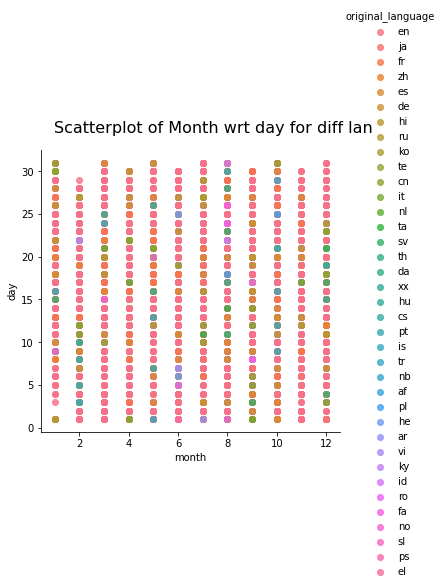

In [55]:
sns.lmplot('month', 'day', data=df2, fit_reg=False, hue="original_language")
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of Month wrt day for diff lan', fontsize=16)

## 6.9  Using Box Plot

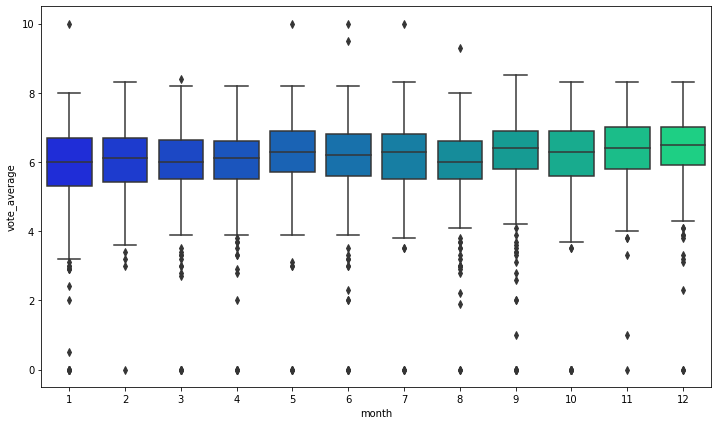

In [56]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='month',y='vote_average',data=df2,palette='winter')

**Observations:**
- Vote was **high** almost **6.5** in the month of **5 ,6,7,9,10,11,12.**

### 6.10 Which is the Month  that experienced most release of movies? 

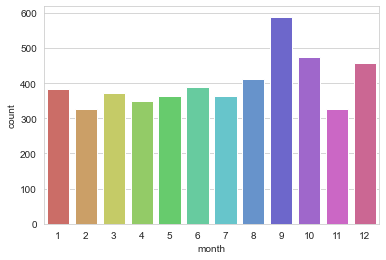

In [57]:
sns.set_style("whitegrid")
sns.countplot(data=df2, x='month', palette= 'hls')

**Observations:**
- Its the **September.**

### 6.11 Which is the day  that experienced most release of movies? 

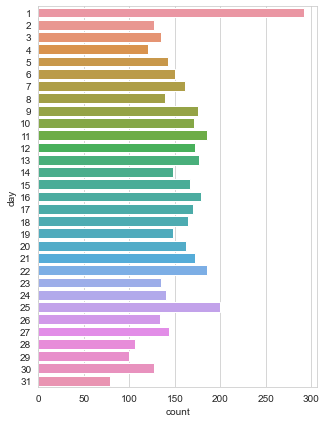

In [58]:
sns.set_style("whitegrid")
countplt, ax = plt.subplots(figsize = (5,7))
sns.countplot(data=df2, y='day')

**Observations:**
- **First day** of every **month** experienced **most release of movies.**

### 6.12 Which is the year  that experienced most release of movies? 

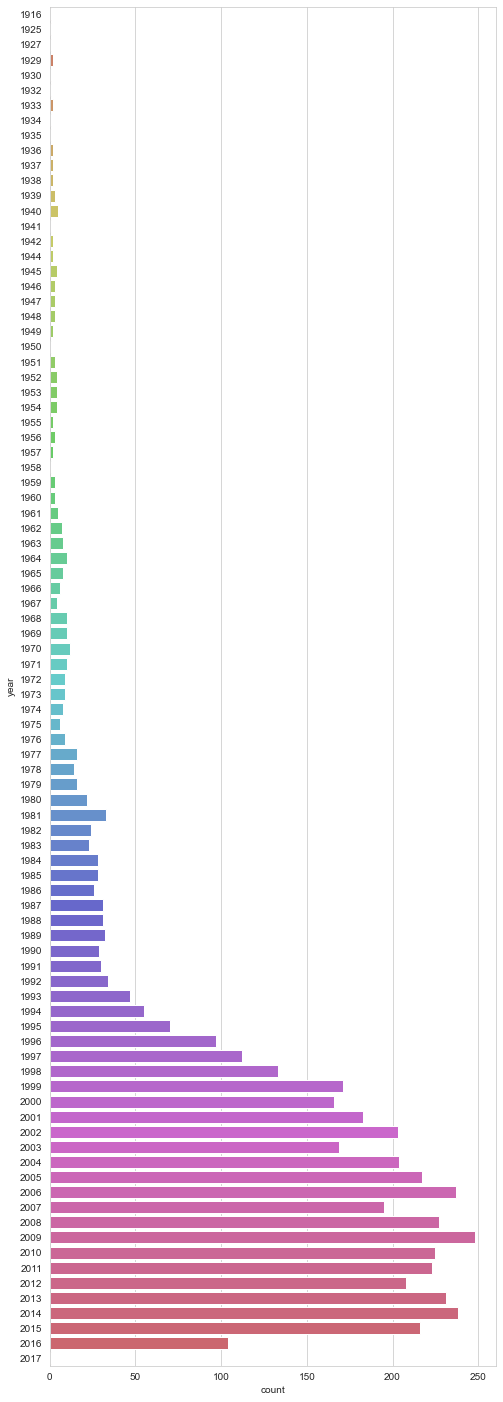

In [59]:
sns.set_style("whitegrid")
countplt, ax = plt.subplots(figsize = (8,25))
sns.countplot(data=df2, y='year', palette= 'hls')

**Observations:**
- **2009** was the **year** that experienced **most release of movies.**

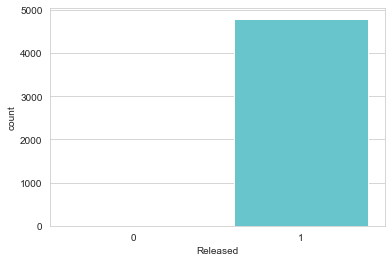

In [60]:
sns.set_style("whitegrid")
sns.countplot(data=df2, x='Released', palette= 'hls')

**Observations:**
- Released count is **more** than not released.

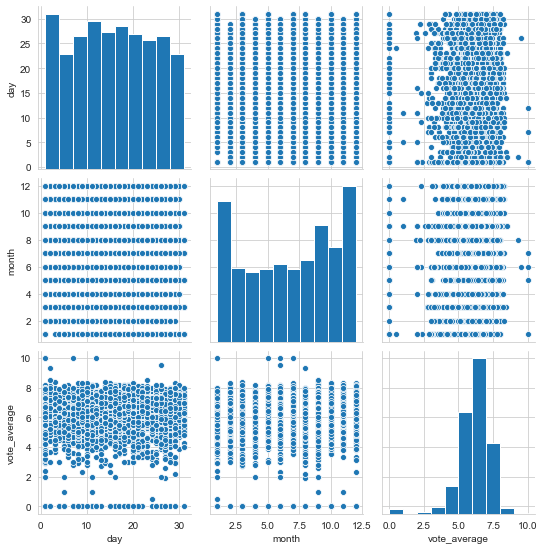

In [61]:
sns.pairplot(df2[["day","month","vote_average"]], dropna=True)

**Observations:**
- **Vote average** is between 6 to 6.5.
- It depicts the **variations** on monthly and per day basis. 

### 6.13  Establish correlation between all the features using heatmap

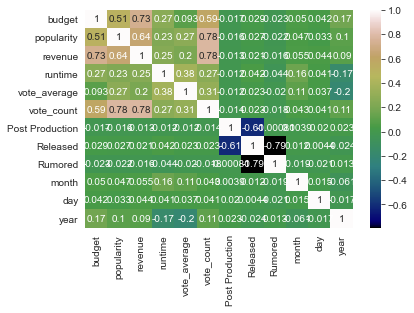

In [62]:
sns.heatmap(df2.corr(),cmap="gist_earth",annot=True)

**Observations:** 
- It gives **correlation** between **features** and states whether they are **positively or negatively correlated.**

## 7. Content Based Recommedation

In [63]:
df2.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title_x', 'vote_average', 'vote_count', 'title_y', 'cast',
       'crew', 'Post Production', 'Released', 'Rumored', 'month', 'day',
       'year'],
      dtype='object')

In [64]:
df2["overview"][1]

'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfid = TfidfVectorizer(stop_words="english")

In [67]:
df2['overview'] = df2['overview'].fillna('')

In [68]:
matrix = tfid.fit_transform(df2['overview'])

In [69]:
matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [70]:
matrix.shape

(4803, 20978)

In [71]:
from sklearn.metrics.pairwise import linear_kernel

In [72]:
cos_sim = linear_kernel(matrix, matrix)

In [73]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [74]:
cos_sim.shape

(4803, 4803)

In [75]:
indicies = pd.Series(df2.index, index=df2['title_y']).drop_duplicates()

In [76]:
indicies.head()

title_y
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [77]:
def get_5_rec(title, cosine_sim = cos_sim):
    #found the index of movie
    idx = indicies[title]
    
    # exttracting sim. scores for idx index movie
    score = list(enumerate(cosine_sim[idx]))
    
    #sorted the list above
    score = sorted(score, key=lambda x:x[1], reverse = True)
    
    #we extract top 5 reccom.
    score = score[1:6]
    
    #we saved our all of the reccom. index 
    movie_idx = [i[0] for i in score]
    
    #returned reccom. movies title
    return df2['title_y'].iloc[movie_idx]

In [78]:
title = 'Avatar'
idx = indicies[title]

In [79]:
sim_scs = list(enumerate(cos_sim[idx]))

In [80]:
sim_scs

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0249951158376727),
 (4, 0.0),
 (5, 0.0303525438443129),
 (6, 0.0),
 (7, 0.03758069690343087),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.01978766288618951),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0349695829781853),
 (27, 0.04705452709989043),
 (28, 0.0),
 (29, 0.02518543163480529),
 (30, 0.0),
 (31, 0.06153392877569968),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.07454624070840556),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.021794850562028286),
 (44, 0.0),
 (45, 0.0611498614502933),
 (46, 0.0),
 (47, 0.03398446515527808),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68,

In [81]:
get_5_rec('John Carter')

1254                     Get Carter
4161    The Marine 4: Moving Target
2932                   Raising Cain
3349                      Desperado
1307                  The Hurricane
Name: title_y, dtype: object

## 8. Using Multi-features 

In [82]:
df2.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title_x', 'vote_average', 'vote_count', 'title_y', 'cast',
       'crew', 'Post Production', 'Released', 'Rumored', 'month', 'day',
       'year'],
      dtype='object')

In [83]:
df2.head(4)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,...,vote_count,title_y,cast,crew,Post Production,Released,Rumored,month,day,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,...,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,1,0,12,10,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,...,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,1,0,5,19,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,...,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0,1,0,10,26,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,...,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",0,1,0,7,16,2012


In [84]:
from ast import literal_eval

In [85]:
features = ['cast','crew', 'keywords', 'genres']

In [86]:
for x in features:
    df2[x] = df2[x].apply(literal_eval)

In [87]:
df2['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [88]:
df2['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [89]:
df2['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [90]:
df2['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [91]:
def get_inf_dir(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
        

In [92]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 5:
            names = names[:5]
        return names
    return []

In [93]:
df2['director'] = df2['crew'].apply(get_inf_dir)

In [94]:
df2['director'][0]

'James Cameron'

In [95]:
df2['director'].tail()

4798    Robert Rodriguez
4799        Edward Burns
4800         Scott Smith
4801         Daniel Hsia
4802    Brian Herzlinger
Name: director, dtype: object

In [96]:
features = ['cast', 'keywords', 'genres']

In [97]:
for x in features:
    df2[x] = df2[x].apply(get_list)

In [98]:
df2['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [99]:
df2['genres'].isnull().sum()

0

In [100]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x)
        else:
            return ''

In [101]:
features = ['cast', 'keywords', 'genres' , 'director']

In [102]:
df2['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2        [spy, based on novel, secret agent, sequel, mi6]
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4803, dtype: object

In [103]:
for x in features:
    df2[x] = df2[x].apply(clean_data)

In [104]:
def create_feature(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' '+ ' '.join(x['genres']) + ' '+ ' '.join(x['director'])

In [105]:
df2['soup'] = df2.apply(create_feature, axis=1)

In [106]:
df2['soup'][0]

'cultureclash future spacewar spacecolony society samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez action adventure fantasy sciencefiction j a m e s   c a m e r o n'

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tfid1 = TfidfVectorizer(stop_words = 'english')
matrix1 = tfid1.fit_transform(df2['soup'])

In [109]:
matrix1

<4803x14775 sparse matrix of type '<class 'numpy.float64'>'
	with 55567 stored elements in Compressed Sparse Row format>

In [110]:
from sklearn.metrics.pairwise import cosine_similarity

In [111]:
cos_sim1 = cosine_similarity(matrix1, matrix1)

In [112]:
cos_sim1.shape

(4803, 4803)

In [113]:
def get_5_rec(title, cos_sim1 = cos_sim1):
    #found the index of movie
    idx = indicies[title]
    
    # exttracting sim. scores for idx index movie
    sim_scs = list(enumerate(cos_sim1[idx]))
    
    #sorted the list above
    sim_scs = sorted(sim_scs, key=lambda x:x[1], reverse = True)
    
    #we extract top 5 reccom.
    sim_scs = sim_scs[1:6]
    
    #we saved our all of the reccom. index 
    movie_idx = [i[0] for i in sim_scs]
    
    #returned reccom. movies title
    return df2['title_y'].iloc[movie_idx]

In [114]:
get_5_rec('John Carter')

373              Mission to Mars
270                  The Martian
122     X-Men Origins: Wolverine
1508               The Number 23
2964       The Last Days on Mars
Name: title_y, dtype: object